In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading and Understanding the Data

In [2]:
# Loading car-price data into dataframe car_df
car_df = pd.read_csv("CarPrice_Assignment.csv")

# Checking data of car_df
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Checking shape of car_df
car_df.shape

(205, 26)

In [4]:
# Checking information of columns of car_df
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# Checking summary statistics of car_train
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


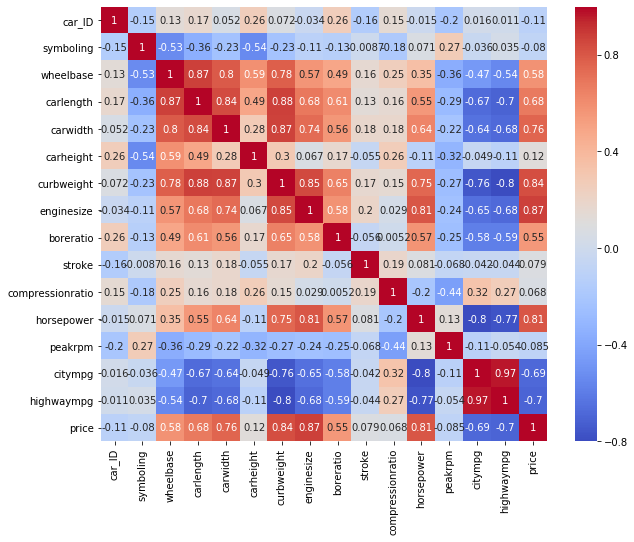

In [6]:
# Checking correlation between numerical variables
plt.figure(figsize = (10,8))
sns.heatmap(car_df.corr(),annot = True, cmap="coolwarm")

# Data Cleaning

In [7]:
# Checking uniqueness of all the columns
car_df_columns = []
for x in car_df.columns.to_list():
    if len(car_df[x].unique()) == len(car_df[x]):
        car_df_columns.append(x)
    else:
        pass
print("List of columns with unique-values : {}".format(car_df_columns))

List of columns with unique-values : ['car_ID']


In [8]:
# Removing columns with unique-values
car_df = car_df.drop(car_df_columns, axis=1)

In [9]:
# Checking if there is any leading or trailing whitespace in the name of columns
columns_with_space = []
for x in car_df.columns.to_list():
    if x[0] == " " or x[-1] == " ":
        columns_with_space.append(x)
print("List of columns with leading or trailing whitespace: {}".format(columns_with_space))        

List of columns with leading or trailing whitespace: []


In [10]:
# Checking if there is any missing value in the dataframe "car_df"
round(100*(car_df.isnull().sum()/len(car_df.index)), 2)

symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [11]:
# Checking if there is any leading or trailing whitespace in the values of dataframe "car_df"
print("List of values of dataframe which has leading or trailing whitespace") 
car_df_values = []
car_df_cols = {}
for x in car_df.columns.to_list():
    if car_df[x].dtype == "O":
        for i in range(len(car_df.index)):
            if car_df[x][i][0] == " " or car_df[x][i][-1] == " ":
                print("{}: {}: '{}'".format(i, x, car_df[x][i]))

List of values of dataframe which has leading or trailing whitespace
44: CarName: 'isuzu D-Max '
46: CarName: 'isuzu D-Max '


In [12]:
# Removing leading or trailing whitespace from values of dataframe "car_df
car_df["CarName"] = car_df["CarName"].replace({"isuzu D-Max ":"isuzu D-Max"})

In [13]:
# Splitting column "CarName" to extract only compnay names and creating new column "CompanyName"
car_df["CompanyName"] = car_df["CarName"].apply(lambda x : str(x).split(" ")[0].lower())
car_df["CompanyName"].head(10)

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: CompanyName, dtype: object

In [14]:
# Checking values of "CompanyName"
car_df["CompanyName"].value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
renault         2
maxda           2
mercury         1
toyouta         1
vokswagen       1
porcshce        1
Name: CompanyName, dtype: int64

In [15]:
# Correcting spelling mistakes in column "CompanyName"
car_df["CompanyName"] = car_df["CompanyName"].replace({"toyouta":"toyota", "vw":"volkswagen", "vokswagen":"volkswagen", "maxda":"mazda", "porcshce":"porsche", "alfa-romero":"alfa-romeo"})

In [16]:
# Dropping column "CarName"
car_df =  car_df.drop(["CarName"], axis=1)

In [17]:
# Checking duplicated rows in the dataframe "car_df"
car_df.duplicated().any()

False

# Visulaising Data

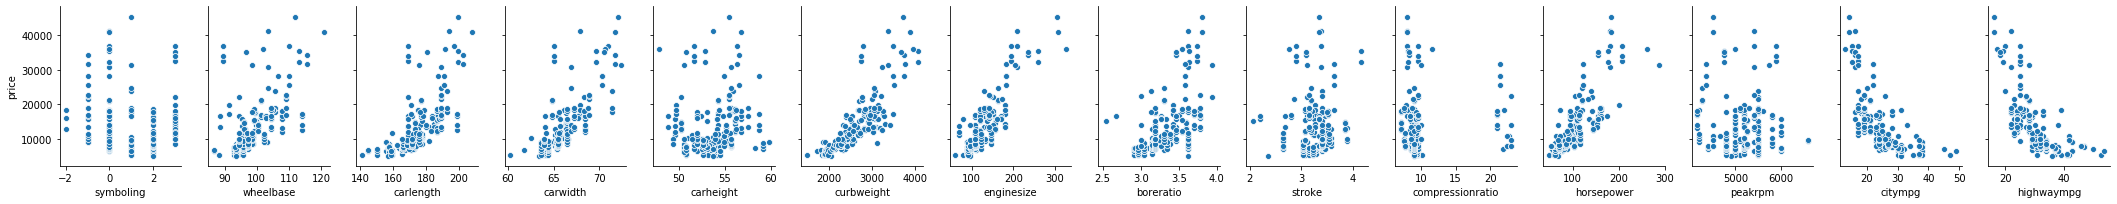

In [18]:
# Visualising Numeric Variables "symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg" and "highwaympg"
sns.pairplot(car_df, x_vars=["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"], y_vars='price', size=3, aspect=0.7, kind='scatter')

According to above graphs, we can say that dependent variable(price) has linear relatioship with some numeric variables.

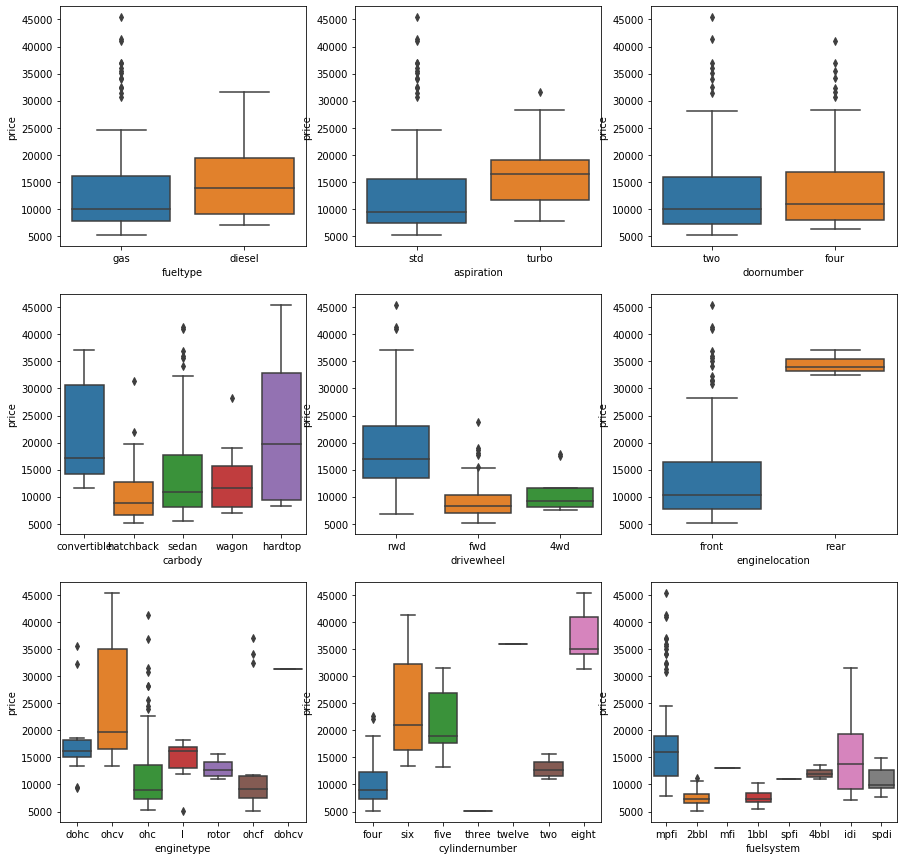

In [19]:
# Visualising Categorical Variables fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber and fuelsystem
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x="fueltype", y="price", data=car_df)
plt.subplot(3, 3, 2)
sns.boxplot(x="aspiration", y="price", data=car_df)
plt.subplot(3, 3, 3)
sns.boxplot(x="doornumber", y="price", data=car_df)
plt.subplot(3, 3, 4)
sns.boxplot(x="carbody", y="price", data=car_df)
plt.subplot(3, 3, 5)
sns.boxplot(x="drivewheel", y="price", data=car_df)
plt.subplot(3, 3, 6)
sns.boxplot(x="enginelocation", y="price", data=car_df)
plt.subplot(3, 3, 7)
sns.boxplot(x="enginetype", y="price", data=car_df)
plt.subplot(3, 3, 8)
sns.boxplot(x="cylindernumber", y="price", data=car_df)
plt.subplot(3, 3, 9)
sns.boxplot(x="fuelsystem", y="price", data=car_df)

According to above graphs, we can say that there is difference in price across different levels of some categorical variables.

In [20]:
# Doing binary mapping for categorical variables with two levels
car_df["fueltype"] = car_df["fueltype"].map({"gas": 0, "diesel": 1})
car_df["aspiration"] = car_df["aspiration"].map({"std": 0, "turbo": 1})
car_df["doornumber"] = car_df["doornumber"].map({"two": 0, "four": 1})
car_df["enginelocation"] = car_df["enginelocation"].map({"front": 0, "rear": 1})
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [21]:
# Doing dummy encoding for categorical variables with more than two levels
var_dummies = pd.get_dummies(car_df[["CompanyName", "carbody", "drivewheel", "enginetype", "cylindernumber", "fuelsystem"]], drop_first=True)
car_df = pd.concat([car_df, var_dummies], axis=1)

In [22]:
# Dropping categorical variables which was used for dummy encoding
car_df =  car_df.drop(["CompanyName", "carbody", "drivewheel", "enginetype", "cylindernumber", "fuelsystem"], axis=1)

In [23]:
car_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [24]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
symboling                 205 non-null int64
fueltype                  205 non-null int64
aspiration                205 non-null int64
doornumber                205 non-null int64
enginelocation            205 non-null int64
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
CompanyName_audi        

# Data Prepration

In [25]:
# Spliting dataframe "car_df" to training data and testing data with ratio of 70:30
car_train, car_test = train_test_split(car_df, train_size=0.7, test_size=0.3, random_state=100)

In [26]:
# Checking size of training data
car_train.shape

(143, 65)

In [27]:
# Checking size of testing data
car_test.shape

(62, 65)

In [28]:
# Scaling training data using Min-Max Scaling
# for all column except binary and dummy variables
scalar_obj = MinMaxScaler()
num_vars = ["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]
car_train[num_vars] = scalar_obj.fit_transform(car_train[num_vars])

In [29]:
# Checking the data of car_train
car_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [30]:
# Checking summary statistics of car_train
car_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.090909,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [31]:
# Deviding training data into X_train and y_train
y_train = car_train.pop("price")
X_train = car_train

# Model Building

In [32]:
# Creating LinearRegression object and fitting model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE to get top 10 variables 
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [33]:
# Checking columns with ranking and status given by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 45),
 ('fueltype', False, 25),
 ('aspiration', False, 14),
 ('doornumber', False, 44),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('CompanyName_audi', False, 37),
 ('CompanyName_bmw', True, 1),
 ('CompanyName_buick', False, 38),
 ('CompanyName_chevrolet', False, 23),
 ('CompanyName_dodge', False, 20),
 ('CompanyName_honda', False, 22),
 ('CompanyName_isuzu', False, 43),
 ('CompanyName_jaguar', False, 28),
 ('CompanyName_mazda', False, 48),
 ('CompanyName_mercury', False, 51),
 ('CompanyName_mitsubishi', False, 13),
 ('CompanyName_nissan', False, 46),
 ('CompanyName_peugeot', False, 6),
 ('CompanyName_plymouth', False, 19),
 ('CompanyName

In [34]:
# Checking top 10 variables found by RFE
X_train.columns[rfe.support_]

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'CompanyName_bmw', 'CompanyName_porsche', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

## Model-1
Creating Linear Model using statsmodels

In [35]:
# Creating new dataframe X_train_top from all top 10 variables we got after RFE
X_train_top = X_train[['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'CompanyName_bmw', 'CompanyName_porsche', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [114]:
# Checking summary of Model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.21e-64
Time:                        17:03:00   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [115]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
2,curbweight,41.06
1,carwidth,25.19
3,enginesize,24.95
4,boreratio,9.78
6,CompanyName_porsche,1.67
0,enginelocation,1.61
8,cylindernumber_twelve,1.50
9,cylindernumber_two,1.27
5,CompanyName_bmw,1.18
7,cylindernumber_three,1.01


In Model-1, there is a variable "cylindernumber_twelve" who's p-value is 0.511 which is greater than 0.05 means variable "cylindernumber_twelve" is insignificant. We will remove insignificant variable "cylindernumber_twelve" and will create model again.

## Model-2
Creating Linear Model using statsmodels

In [116]:
# Creating new dataframe X_train_top from remaining variables
X_train_top = X_train[['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'CompanyName_bmw', 'CompanyName_porsche', 'cylindernumber_three', 'cylindernumber_two']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr2 = sm.OLS(y_train, X_train_lm).fit()

In [117]:
# Checking summary of Model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.18e-65
Time:                        17:04:17   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

In [118]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
2,curbweight,38.41
1,carwidth,24.99
3,enginesize,17.70
4,boreratio,9.70
6,CompanyName_porsche,1.66
0,enginelocation,1.60
8,cylindernumber_two,1.21
5,CompanyName_bmw,1.14
7,cylindernumber_three,1.01


In Model-2, there are variables who's VIF is greater than 5 which shows multicollinearity in the model, We will remove variable "curbweight" as it is having maximum VIF(38.41) and will create model again.

## Model-3
Creating Linear Model using statsmodels

In [119]:
# Creating new dataframe X_train_top from remaining variables
X_train_top = X_train[['enginelocation', 'carwidth', 'enginesize', 'boreratio',
       'CompanyName_bmw', 'CompanyName_porsche', 'cylindernumber_three', 'cylindernumber_two']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr3 = sm.OLS(y_train, X_train_lm).fit()

In [120]:
# Checking summary of Model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.01e-63
Time:                        17:04:35   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [121]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
1,carwidth,16.48
2,enginesize,10.03
3,boreratio,9.35
0,enginelocation,1.60
5,CompanyName_porsche,1.59
7,cylindernumber_two,1.17
4,CompanyName_bmw,1.14
6,cylindernumber_three,1.01


In Model-3, there is a variable "boreratio" who's p-value is 0.077 which is greater than 0.05 means variable "boreratio" is insignificant. Also it's VIF is 9.35 which is greater than 5 which shows multicollinearity in the model, We will remove variable "boreratio" and will create model again.

## Model-4
Creating Linear Model using statsmodels

In [122]:
# Creating new dataframe X_train_top from remaining variables
X_train_top = X_train[['enginelocation', 'carwidth', 'enginesize', 'CompanyName_bmw', 'CompanyName_porsche', 'cylindernumber_three', 'cylindernumber_two']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr4 = sm.OLS(y_train, X_train_lm).fit()

In [123]:
# Checking summary of Model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.04e-64
Time:                        17:04:43   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1925 

In [124]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
2,enginesize,9.98
1,carwidth,9.69
0,enginelocation,1.58
4,CompanyName_porsche,1.57
6,cylindernumber_two,1.16
3,CompanyName_bmw,1.14
5,cylindernumber_three,1.00


In Model-4, there is a variable "CompanyName_porsche" who's p-value is 0.118 which is greater than 0.05 means variable "CompanyName_porsche" is insignificant. We will remove insignificant variable "CompanyName_porsche" and will create model again.

## Model-5
Creating Linear Model using statsmodels

In [125]:
# Creating new dataframe X_train_top from remaining variables
X_train_top = X_train[['enginelocation', 'carwidth', 'enginesize', 'CompanyName_bmw', 'cylindernumber_three', 'cylindernumber_two']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr5 = sm.OLS(y_train, X_train_lm).fit()

In [126]:
# Checking summary of Model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.62e-64
Time:                        17:05:03   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1976 

In [127]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
2,enginesize,9.98
1,carwidth,9.63
5,cylindernumber_two,1.16
3,CompanyName_bmw,1.13
0,enginelocation,1.08
4,cylindernumber_three,1.00


In Model-5, there are variables who's VIF is greater than 5 which shows multicollinearity in the model, We will remove variable "enginesize" as it is having maximum VIF(9.98) and will create model again.

## Model-6
Creating Linear Model using statsmodels

In [128]:
# Creating new dataframe X_train_top from remaining variables
X_train_top = X_train[['enginelocation', 'carwidth', 'CompanyName_bmw', 'cylindernumber_three', 'cylindernumber_two']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr6 = sm.OLS(y_train, X_train_lm).fit()

In [129]:
# Checking summary of Model
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     115.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.02e-47
Time:                        17:05:16   Log-Likelihood:                 135.20
No. Observations:                 143   AIC:                            -258.4
Df Residuals:                     137   BIC:                            -240.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2348 

In [130]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
1,carwidth,1.08
2,CompanyName_bmw,1.05
4,cylindernumber_two,1.02
0,enginelocation,1.00
3,cylindernumber_three,1.00


In Model-6, there is a variable "cylindernumber_two" who's p-value is 0.523 which is greater than 0.05 means variable "cylindernumber_two" is insignificant. We will remove insignificant variable "cylindernumber_two" and will create model again.

## Model-7
Creating Linear Model using statsmodels

In [131]:
# Creating new dataframe X_train_top from remaining variables
X_train_top = X_train[['enginelocation', 'carwidth', 'CompanyName_bmw', 'cylindernumber_three']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr7 = sm.OLS(y_train, X_train_lm).fit()

In [132]:
# Checking summary of Model
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.92e-48
Time:                        17:05:27   Log-Likelihood:                 134.98
No. Observations:                 143   AIC:                            -260.0
Df Residuals:                     138   BIC:                            -245.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2337 

In [133]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
1,carwidth,1.06
2,CompanyName_bmw,1.05
0,enginelocation,1.00
3,cylindernumber_three,1.00


BMW is a luxury brand, In anyway price will increase for luxury brand so we will drop variable "CompanyName_bmw" as it will not be significant factor to describe the price of car. 

## Model-8
Creating Linear Model using statsmodels

In [134]:
# Creating new dataframe X_train_top from remaining variables
X_train_top = X_train[['enginelocation', 'carwidth', 'cylindernumber_three']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr8 = sm.OLS(y_train, X_train_lm).fit()

In [135]:
# Checking summary of Model
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     113.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.22e-37
Time:                        17:06:37   Log-Likelihood:                 105.53
No. Observations:                 143   AIC:                            -203.1
Df Residuals:                     139   BIC:                            -191.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2329 

In [136]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
0,enginelocation,1.0
1,carwidth,1.0
2,cylindernumber_three,1.0


In Model-8, there is a variable "cylindernumber_three" who's p-value is 0.054 which is greater than 0.05 means variable "cylindernumber_three" is insignificant. We will remove insignificant variable "cylindernumber_three" and will create model again.

## Model-9
Creating Linear Model using statsmodels

In [137]:
# Creating new dataframe X_train_top from remaining variables
X_train_top = X_train[['enginelocation', 'carwidth']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr9 = sm.OLS(y_train, X_train_lm).fit()

In [138]:
# Checking summary of Model
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     165.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.41e-37
Time:                        17:07:04   Log-Likelihood:                 103.62
No. Observations:                 143   AIC:                            -201.2
Df Residuals:                     140   BIC:                            -192.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2209      0.027     -8.

In [139]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
0,enginelocation,1.0
1,carwidth,1.0


Now we will replace variable "carwidth" with variable "curbweight" and will check if it improves the Model-9

## Model-10
Creating Linear Model using statsmodels

In [140]:
# Creating new dataframe X_train_top from remaining variables
X_train_top = X_train[['enginelocation', 'curbweight']].copy()

# Adding Constant to X_train
X_train_lm = sm.add_constant(X_train_top)

# Fitting model using OLS method
lr10 = sm.OLS(y_train, X_train_lm).fit()

In [141]:
# Checking summary of Model
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     250.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.25e-47
Time:                        17:07:14   Log-Likelihood:                 125.80
No. Observations:                 143   AIC:                            -245.6
Df Residuals:                     140   BIC:                            -236.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1404      0.019     -7.

In [142]:
# Checking the multicollinearity of the independent variables

# Creating dataframe to contain names of variables and their VIF values
vif = pd.DataFrame()
vif["variables"] = X_train_top.columns
vif["VIF"] = [variance_inflation_factor(X_train_top.values, i) for i in range(X_train_top.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,variables,VIF
0,enginelocation,1.01
1,curbweight,1.01


By replacing variable "carwidth" with variable "curbweight", Adj. R-squared increased from 69.8% to 77.9% which means our model is improved.

R-squared is 78.2% which means model Accuracy is 78.2% and VIFs & p-values both are within an acceptable range. 
So now we go ahead and make predictions & residual analysis using Model-10.

# Residual analysis

Checking if error terms are normally distributed

In [143]:
# Predicting value of X_train_lm using Model-10
y_train_pred = lr10.predict(X_train_lm)

#Finding residuals
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residuals')

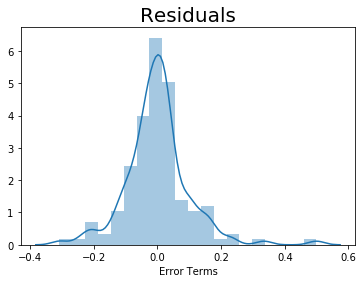

In [144]:
# Plotting histogram using residuals
sns.distplot(res, bins=20)
plt.xlabel("Error Terms")
plt.title("Residuals", fontsize=20)

According to above plot, error terms are normally distributed.

.

Text(0.5, 1.0, 'Training Data (Actual Vs Predicted)')

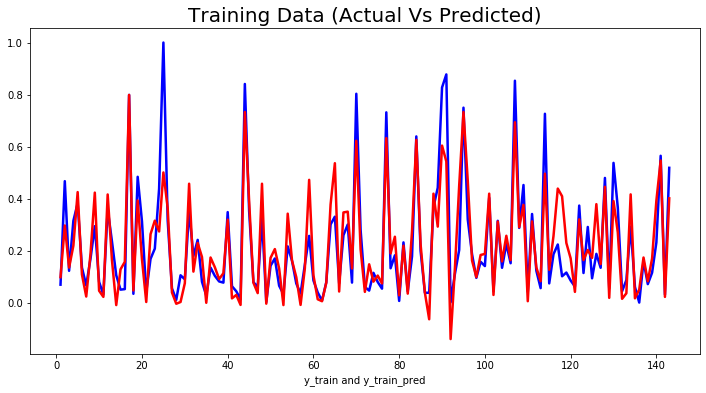

In [145]:
# Plotting graph to check overlap of actual training data and predicted training data
c = [i for i in range(1,144,1)]
plt.figure(figsize=(12, 6))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
plt.xlabel("y_train and y_train_pred")
plt.title("Training Data (Actual Vs Predicted)", fontsize=20)

Checking if error terms are independent of each other

Text(0.5, 1.0, 'Residuals')

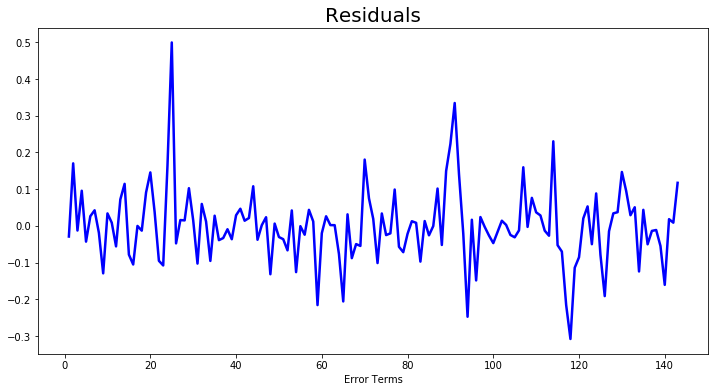

In [146]:
# plotting graph for residuals to check if there is any pattern
plt.figure(figsize=(12, 6))
c = [i for i in range(1,144,1)]
plt.plot(c,res, color="blue", linewidth=2.5, linestyle="-")
plt.xlabel("Error Terms")
plt.title("Residuals", fontsize=20)

Text(0.5, 1.0, 'Residuals')

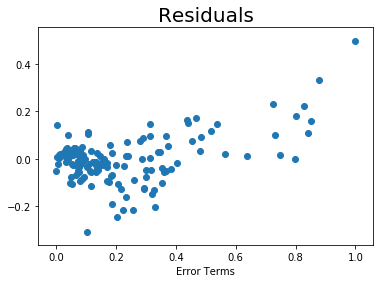

In [147]:
# plotting scatter plot for residuals to check if there is any pattern
plt.scatter(y_train, res)
plt.xlabel("Error Terms")
plt.title("Residuals", fontsize=20)

# Predictions and Evaluation of testing data

In [148]:
# Scaling testing data using scalar object of training data
# for all column except binary and dummy variables
num_vars = ["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]
car_test[num_vars] = scalar_obj.transform(car_test[num_vars])

In [149]:
# Checking summary statistics of car_test
car_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.112903,0.177419,0.564516,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
# Deviding training data into X_train and y_train
y_test = car_test.pop("price")
X_test = car_test

In [152]:
# Creating new dataframe X_test_top from relevant variables used in "X_train_top" 
X_test_top = X_test[list(X_train_top.columns)].copy()

# Adding Constant to X_test
X_test_lm = sm.add_constant(X_test_top)

In [153]:
# Predicting value of X_test_lm using Model-10
y_test_pred = lr10.predict(X_test_lm)

## Model Evaluation

Text(0.5, 1.0, 'Testing Data (Actual Vs Predicted)')

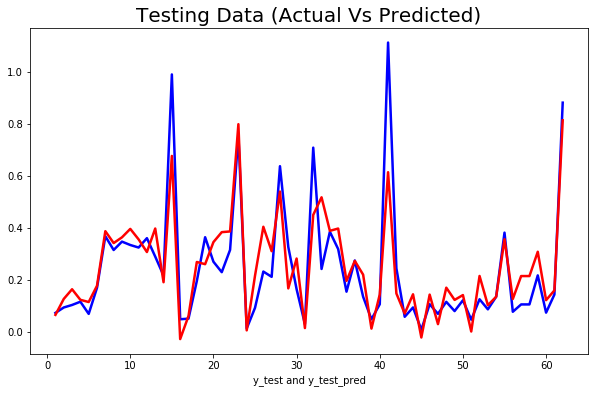

In [154]:
# Plotting graph to check overlap of actual testing data and predicted testing data
c = [i for i in range(1,63,1)]
plt.figure(figsize=(10, 6))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
plt.xlabel("y_test and y_test_pred")
plt.title("Testing Data (Actual Vs Predicted)", fontsize=20)

According to above plot, predicted data is nicely overlapping actual data which means model is predicting pretty well.

.

In [155]:
# Checking R-squared of testing data
r2_score(y_test, y_test_pred)

0.7667903624888625

R-squared of Model-10 is 78.2% and R-squared of testing data is 76.7%, difference is only 1.5% which represents the stability of the Model-10

## Conclusion

Variables enginelocation and curbweight are significant factors to predict the price of a car in American Market.

Variables enginelocation and curbweight can describe the price of a car using equation of our best fitted line which is:

price = -0.1404 + 0.5096 x enginelocation + 0.8731 x curbweight.